<a href="https://colab.research.google.com/github/ycchiu18/xiemen1129/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ximen1129/raw/main/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ximen1129/raw/main/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f84c3dccc50>)

In [71]:
import pandas as pd
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")
test01 = test["PassengerId"]

In [4]:
datas = pd.concat([train, test], axis=0, ignore_index=True)
datas = datas.drop(["PassengerId", "Survived"], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
name = "Braund, Mr. Owen Harris"
name.split(",")[-1].split(".")[0].strip()

'Mr'

In [6]:
def nameflow(name):
  return name.split(",")[-1].split(".")[0].strip()
datas["Name"] = datas["Name"].apply(nameflow)  
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
def cabinflow(cabin):
  if pd.isna(cabin):
    return cabin
  else:
    return cabin[0]
datas["Cabin"] = datas["Cabin"].apply(cabinflow)
datas["Cabin"].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [8]:
dic = datas["Ticket"].value_counts()
def ticketflow(ticket):
  if pd.isna(ticket):
    return ticket
  else:
    return dic[ticket]
datas["Ticket"] = datas["Ticket"].apply(ticketflow)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,1,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
1307,3,Mr,male,NaN,0,0,1,8.0500,NaN,S


In [9]:
s = datas.isna().sum()
s[s != False].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [10]:
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)

In [11]:
med = datas.median().drop(["Pclass"])
datas = datas.fillna(med)

In [12]:
# see again
s = datas.isna().sum()
s[s != False].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [13]:
c = datas["Name"].value_counts()
reserved = c[c>50].index
def nameflow2(mid):
  if mid in reserved:
    return mid
  else:
    return None
datas["Name"] = datas["Name"].apply(nameflow2)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
1305,1,None,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
1307,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [14]:
def inttostring(inte):
  return str(inte)
datas["Pclass"] = datas["Pclass"].apply(inttostring)
datas["Pclass"]

0       3
1       1
2       3
3       1
4       3
       ..
1304    3
1305    1
1306    3
1307    3
1308    3
Name: Pclass, Length: 1309, dtype: object

In [15]:
# One-Hot Encoding
datas = pd.get_dummies(datas) 
# datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,38.0,1,0,2,71.2833,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,35.0,1,0,2,53.1000,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1305,39.0,0,0,3,108.9000,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [16]:
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,38.0,1,0,2,71.2833,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,35.0,1,0,2,53.1000,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1305,39.0,0,0,3,108.9000,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
x = datas.iloc[:(len(train))]
y = train["Survived"]
x_predict = datas.iloc[len(train):]
x_predict 

,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family
891,34.5,0,0,1,7.8292,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
892,47.0,1,0,1,7.0000,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
893,62.0,0,0,1,9.6875,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
894,27.0,0,0,1,8.6625,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
895,22.0,1,1,2,12.2875,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1305,39.0,0,0,3,108.9000,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
      "n_estimators":range(11, 150), 
      "max_depth":range(4, 9)
      }
clf = RandomForestClassifier()
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(4, 9),
                         'n_estimators': range(11, 150)})

In [49]:
print(search.best_score_)
print(search.best_params_)

0.8440199750312111
{'max_depth': 7, 'n_estimators': 93}


In [67]:
import numpy as np
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=93, max_depth=7)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))

[0.82222222 0.86516854 0.74157303 0.87640449 0.85393258 0.85393258
 0.85393258 0.78651685 0.88764045 0.84269663]
0.8384019975031209


In [85]:
clf = RandomForestClassifier(n_estimators=93, max_depth=7)
clf.fit(x, y)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":test01,
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
imp = pd.DataFrame(clf.feature_importances_, index=datas.columns, columns=["Importance"])
imp.sort_values(by="Importance", ascending=False)

,Importance
Sex_male,0.169479
Name_Mr,0.125924
Fare,0.107287
Sex_female,0.104331
Age,0.078700
Pclass_3,0.061440
Ticket,0.058660
Family,0.046802
Name_Mrs,0.041743
Name_Miss,0.039358


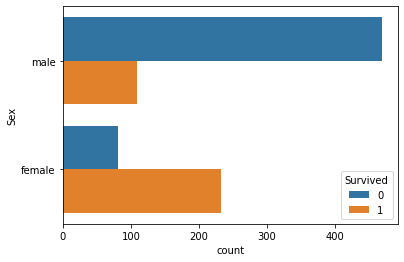

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y=train["Sex"], hue=train["Survived"])

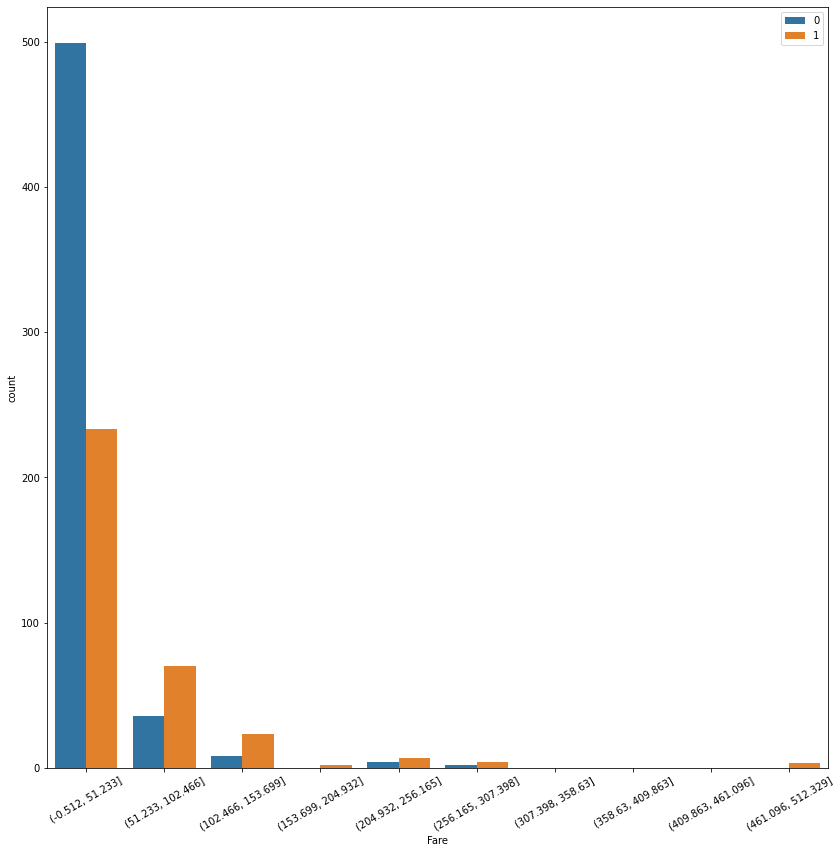

In [98]:
c = pd.cut(train["Fare"], bins=10)
plt.figure(figsize=(14, 14))
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=30)
plt.legend(loc="upper right")

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
datas_scale = pd.DataFrame(datas_scale, columns=datas.columns)
datas_scale

,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
x_scale = datas_scale.iloc[:(len(train))]
x_predict_scale = datas_scale.iloc[len(train):]

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
params = {
      "n_neighbors":range(2,100)
      }
clf = KNeighborsClassifier()
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scale,y)
print(search.best_score_)
print(search.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [81]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_scale, y)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":test01,
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
